# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import circs, Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Noise Model

In [3]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [4]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [5]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [6]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is -0.007976806640625
Mitigated diff is -0.004529896777021758
1
Noisy diff is -0.051436035156249976
Mitigated diff is -0.0002287797380570722
2
Noisy diff is 0.011302246093750024
Mitigated diff is 0.02668182816410547
3
Noisy diff is 0.024361083984374865
Mitigated diff is 0.00018140197001115244
4
Noisy diff is -0.007033935546875009
Mitigated diff is -0.010995404611664372
5
Noisy diff is 0.017335449218749965
Mitigated diff is 0.029882494064780052
6
Noisy diff is -0.018159667968749994
Mitigated diff is -0.01507745261465964
7
Noisy diff is 0.09603979492187509
Mitigated diff is 0.07055510060143855
8
Noisy diff is -0.02353369140625
Mitigated diff is -0.016336409205088387
9
Noisy diff is -0.040040283203125
Mitigated diff is -0.01300572117769383
10
Noisy diff is -0.060576171875
Mitigated diff is -0.026132839567116928
11
Noisy diff is -0.025422851562500015
Mitigated diff is -0.009653422082474827
12
Noisy diff is -0.029644531249999995
Mitigated diff is -0.006109146123754017
13
Noisy 

Noisy diff is 0.03465136718750006
Mitigated diff is 0.049391053624956105
108
Noisy diff is 0.021998779296874993
Mitigated diff is 0.018620945894383345
109
Noisy diff is 0.04303442382812506
Mitigated diff is 0.019621978320074174
110
Noisy diff is -0.019947265624999988
Mitigated diff is -0.008279205717242805
111
Noisy diff is -0.007549560546874973
Mitigated diff is 0.007777865298763759
112
Noisy diff is -0.06103515625
Mitigated diff is -0.020159548432253538
113
Noisy diff is 0.039671386718750035
Mitigated diff is 0.028750509803781243
114
Noisy diff is 0.015047607421874998
Mitigated diff is 0.013749622968177666
115
Noisy diff is 0.03326489257812498
Mitigated diff is 0.03214779748788538
116
Noisy diff is -0.011192382812499957
Mitigated diff is -0.004922823746746768
117
Noisy diff is 0.023462158203125028
Mitigated diff is 0.019070554553953012
118
Noisy diff is -0.046890380859375004
Mitigated diff is -0.02765802134605845
119
Noisy diff is 0.011152343750000071
Mitigated diff is 0.008193684895

Noisy diff is -0.042838867187500004
Mitigated diff is -0.025364020439480557
214
Noisy diff is -0.05276000976562502
Mitigated diff is -0.04286044224330357
215
Noisy diff is -0.0064787597656250084
Mitigated diff is -0.0010333506825206396
216
Noisy diff is 0.057076416015624964
Mitigated diff is 0.039621367640605865
217
Noisy diff is -0.007380371093749949
Mitigated diff is 0.0024470595214248214
218
Noisy diff is 0.04026611328125007
Mitigated diff is 0.032261807701846834
219
Noisy diff is -0.04681738281250001
Mitigated diff is -0.02670975242369719
220
Noisy diff is 0.02787988281249998
Mitigated diff is 0.015376830488305182
221
Noisy diff is -0.012663574218749973
Mitigated diff is 0.006493048162774739
222
Noisy diff is 0.04201220703125008
Mitigated diff is 0.02773378494877521
223
Noisy diff is -0.03919433593750002
Mitigated diff is -0.008839497230707732
224
Noisy diff is 0.013436523437500014
Mitigated diff is 0.006972414494143042
225
Noisy diff is 0.0518874511718751
Mitigated diff is 0.04122

Noisy diff is -0.0015275878906249596
Mitigated diff is 0.006885885512057377
320
Noisy diff is 0.014698730468750032
Mitigated diff is 0.012893183915693662
321
Noisy diff is -0.003254638671874921
Mitigated diff is 0.008635958366720153
322
Noisy diff is 0.009762939453125008
Mitigated diff is -0.0032810968382745442
323
Noisy diff is 0.03372265625000004
Mitigated diff is 0.03464877589858062
324
Noisy diff is -0.005466796875000013
Mitigated diff is 0.011268123700301391
325
Noisy diff is -0.039456542968749994
Mitigated diff is -0.004657824543078448
326
Noisy diff is 0.027979736328125004
Mitigated diff is 0.0172271288227831
327
Noisy diff is 0.012079589843750016
Mitigated diff is 0.021435915500515157
328
Noisy diff is 0.01940722656249999
Mitigated diff is 0.018958314195570036
329
Noisy diff is -0.04565869140624999
Mitigated diff is -0.008289473037812883
330
Noisy diff is 0.002470947265625023
Mitigated diff is 0.010273212854853442
331
Noisy diff is 0.004787109375000043
Mitigated diff is 0.01439

Noisy diff is -0.043868164062500006
Mitigated diff is -0.01730043808188339
425
Noisy diff is 0.004226074218749987
Mitigated diff is -0.0027844795490711838
426
Noisy diff is 0.020144042968749942
Mitigated diff is 0.02155921313387127
427
Noisy diff is 0.055764892578125114
Mitigated diff is 0.0368189130585127
428
Noisy diff is -0.010751464843750003
Mitigated diff is -0.00854571080897669
429
Noisy diff is -0.07525610351562503
Mitigated diff is -0.03050494928790831
430
Noisy diff is 0.04212866210937499
Mitigated diff is 0.017981572257277367
431
Noisy diff is 0.05648535156250001
Mitigated diff is 0.04303587096497252
432
Noisy diff is 0.019031005859375005
Mitigated diff is 0.005022840175232746
433
Noisy diff is 0.08045800781250001
Mitigated diff is 0.05136598408855453
434
Noisy diff is -0.0036091308593750315
Mitigated diff is -0.01100951409159423
435
Noisy diff is -0.027844970703125027
Mitigated diff is 0.010703714156936828
436
Noisy diff is -0.06625732421875001
Mitigated diff is -0.023184146

Noisy diff is 0.06066625976562512
Mitigated diff is 0.04946042089962999
531
Noisy diff is -0.009857177734374944
Mitigated diff is 0.0016438150445475253
532
Noisy diff is -0.1022529296875
Mitigated diff is -0.039081083841288944
533
Noisy diff is 0.005572753906250005
Mitigated diff is 0.004177565593044108
534
Noisy diff is 0.0478652343749999
Mitigated diff is 0.0407332189240881
535
Noisy diff is 0.007949707031249975
Mitigated diff is 0.008323324054657966
536
Noisy diff is -0.01825927734375002
Mitigated diff is -0.012779661863743907
537
Noisy diff is 0.03752709960937495
Mitigated diff is 0.028841309011084393
538
Noisy diff is 0.09016455078124996
Mitigated diff is 0.07253377494294933
539
Noisy diff is 0.004708007812500026
Mitigated diff is 0.00982554551568221
540
Noisy diff is -0.013854492187500012
Mitigated diff is 0.008459283133481238
541
Noisy diff is 0.03384057617187508
Mitigated diff is 0.01664518044347152
542
Noisy diff is -0.0010634765624999987
Mitigated diff is -0.00245383944449112

Noisy diff is -0.03054003906250001
Mitigated diff is -0.02686680218110883
637
Noisy diff is -0.017451904296874987
Mitigated diff is 0.01754911453563801
638
Noisy diff is -0.0012492675781249352
Mitigated diff is 0.02305742846968878
639
Noisy diff is -0.027989501953124968
Mitigated diff is 0.011205916430574614
640
Noisy diff is 0.050345458984375036
Mitigated diff is 0.03840662882039847
641
Noisy diff is -0.01964648437499994
Mitigated diff is 0.01676421774839748
642
Noisy diff is -0.08989453124999996
Mitigated diff is -0.038254100429735094
643
Noisy diff is -0.010810058593750005
Mitigated diff is 0.019757699283138752
644
Noisy diff is -0.03916601562500001
Mitigated diff is -0.0101803700802236
645
Noisy diff is -0.010468994140625021
Mitigated diff is 0.019796416409111728
646
Noisy diff is -0.00545068359374995
Mitigated diff is 0.01958307295443018
647
Noisy diff is 0.004049316406250003
Mitigated diff is 0.0028340435768658134
648
Noisy diff is -0.005813964843750075
Mitigated diff is 0.000253

Noisy diff is 0.009581542968750023
Mitigated diff is 0.014549208197401575
742
Noisy diff is 0.006550537109375032
Mitigated diff is 0.011172530691964278
743
Noisy diff is 0.06602075195312496
Mitigated diff is 0.044882735352755
744
Noisy diff is 0.00497094726562497
Mitigated diff is 0.013856199889905663
745
Noisy diff is 0.03433691406250006
Mitigated diff is 0.027095998574211633
746
Noisy diff is -0.010858154296875006
Mitigated diff is -0.005765105444660912
747
Noisy diff is 0.032496582031250054
Mitigated diff is 0.024245522081116744
748
Noisy diff is 0.03574951171874996
Mitigated diff is 0.01937522011408732
749
Noisy diff is 0.009360107421874986
Mitigated diff is 0.005036172255416915
750
Noisy diff is -0.008547607421874964
Mitigated diff is 0.011807910156250018
751
Noisy diff is -0.010578369140624988
Mitigated diff is -0.0024976191072382803
752
Noisy diff is -0.016713378906249965
Mitigated diff is 0.008906714373950742
753
Noisy diff is -0.005922119140625015
Mitigated diff is 0.006353052

Noisy diff is -0.08742651367187493
Mitigated diff is -0.04540273920415516
848
Noisy diff is -0.02351855468749997
Mitigated diff is 0.021476873473748492
849
Noisy diff is 0.09136474609375
Mitigated diff is 0.049385237034016205
850
Noisy diff is -0.018804199218749984
Mitigated diff is 0.015133160569580806
851
Noisy diff is -0.027291992187499975
Mitigated diff is 0.01030562501192385
852
Noisy diff is -0.06376171875000002
Mitigated diff is -0.011784777144836056
853
Noisy diff is -0.015328857421875008
Mitigated diff is -0.015208813983325686
854
Noisy diff is -0.0070104980468749245
Mitigated diff is 0.017103849492521472
855
Noisy diff is -0.027202636718750006
Mitigated diff is -0.0085871791916462
856
Noisy diff is -0.008374023437499989
Mitigated diff is -0.01005147354815325
857
Noisy diff is -0.060222900390625
Mitigated diff is -0.01954006851438493
858
Noisy diff is -0.003460449218749939
Mitigated diff is 0.030777328606723164
859
Noisy diff is -0.00095947265624996
Mitigated diff is 0.0168997

Noisy diff is -0.066462646484375
Mitigated diff is -0.02591224482982299
954
Noisy diff is -0.023508544921874985
Mitigated diff is 0.0002457142737904705
955
Noisy diff is -0.004166503906250035
Mitigated diff is 0.006392078456482764
956
Noisy diff is 0.09552246093750005
Mitigated diff is 0.060282368831282795
957
Noisy diff is -0.03415893554687499
Mitigated diff is -0.0212278794881334
958
Noisy diff is -0.09741601562499996
Mitigated diff is -0.03197279819083709
959
Noisy diff is -0.06235522460937501
Mitigated diff is -0.04383574027968562
960
Noisy diff is -0.03233984375
Mitigated diff is 0.002937628018053945
961
Noisy diff is -0.06652905273437498
Mitigated diff is -0.01939363791590354
962
Noisy diff is -0.01589721679687499
Mitigated diff is -0.02104803679216212
963
Noisy diff is -0.033395751953125
Mitigated diff is 0.009551067158974635
964
Noisy diff is 0.093151611328125
Mitigated diff is 0.04875190599026702
965
Noisy diff is -0.07199584960937501
Mitigated diff is -0.04218652993599284
966

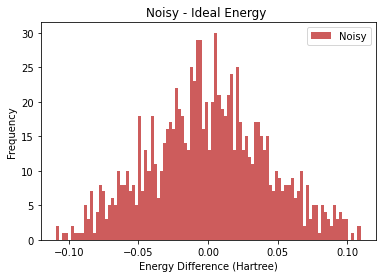

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "indianred", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_full.png', dpi = 1000)

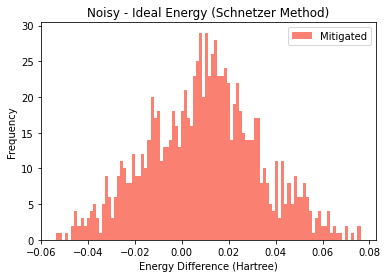

In [8]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "salmon", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_full.png', dpi = 1000)

In [9]:
energies

[[[-1.0905449121762962, 0.1422051028859599, -2.060782460388454],
  -0.23367056326266877,
  -0.24164736990329377,
  -0.23820046003969053],
 [[0.9591838884843336, 1.4870349956683722, -0.38994479526478587],
  0.1442513117373313,
  0.09281527658108132,
  0.14402253199927423],
 [[2.2693408231389807, -2.1224993612024363, -1.3346904218343347],
  -0.4150411687314188,
  -0.40373892263766875,
  -0.3883593405673133],
 [[2.5885184192281345, -1.389307359603448, 1.6794504907343644],
  -0.5653954167782937,
  -0.5410343327939189,
  -0.5652140148082826],
 [[1.0613161812442398, 0.2004288872878912, 1.2015016678216082],
  -0.11707754568454379,
  -0.1241114812314188,
  -0.12807295029620816],
 [[1.1503632187965298, 0.41569136701039744, -0.6883651212126924],
  -0.39931436209079363,
  -0.38197891287204366,
  -0.3694318680260136],
 [[-2.2809700370082546, -3.035670678591981, -1.321952381539692],
  -0.03906411795016876,
  -0.05722378591891875,
  -0.0541415705648284],
 [[-1.8277502983413965, 2.1312334328702187, -

In [10]:
diff_r

[-0.007976806640625,
 -0.051436035156249976,
 0.011302246093750024,
 0.024361083984374865,
 -0.007033935546875009,
 0.017335449218749965,
 -0.018159667968749994,
 0.09603979492187509,
 -0.02353369140625,
 -0.040040283203125,
 -0.060576171875,
 -0.025422851562500015,
 -0.029644531249999995,
 0.049318603515625004,
 -0.08858398437499998,
 -0.044746337890625015,
 -0.026785644531250007,
 0.09949169921875012,
 -0.013568115234374956,
 -0.07432812499999997,
 0.04293139648437505,
 0.007286621093750056,
 -0.05807690429687501,
 0.004401367187500005,
 0.009649414062500028,
 0.02375268554687504,
 -0.01475683593749999,
 -0.04924511718749999,
 -0.058768798828125024,
 0.025958740234374944,
 -0.025762939453124967,
 0.045340820312499974,
 0.035928222656250064,
 -0.076864013671875,
 -0.022863769531250022,
 -0.048298828125,
 0.02205126953125003,
 0.06234814453124993,
 -0.00493530273437498,
 0.025078369140625056,
 0.011275878906250036,
 0.005592041015625104,
 -0.0015932617187499054,
 0.04217236328124985,
 

In [11]:
diff_nr

[-0.004529896777021758,
 -0.0002287797380570722,
 0.02668182816410547,
 0.00018140197001115244,
 -0.010995404611664372,
 0.029882494064780052,
 -0.01507745261465964,
 0.07055510060143855,
 -0.016336409205088387,
 -0.01300572117769383,
 -0.026132839567116928,
 -0.009653422082474827,
 -0.006109146123754017,
 0.037011311252766244,
 -0.04436362262954063,
 -0.0033688667343940697,
 -0.01721232817746491,
 0.06771290660489693,
 0.02747183391139224,
 -0.025685378927712915,
 0.025328252988240818,
 0.019254006529494827,
 -0.02894367384505893,
 0.009690161758814153,
 0.027269494584191867,
 0.036907036734966536,
 0.0034431044432997604,
 -0.01461794162326388,
 -0.029012578160771546,
 0.005859895117902969,
 -0.0015909630582946477,
 0.04839070024861847,
 0.030905005833854915,
 -0.039471853179372685,
 0.010616013717185624,
 -0.026377416661260505,
 0.018731979893712225,
 0.04036987912803336,
 0.023775512203394078,
 0.032390883719299546,
 0.018439151511466134,
 0.015499031964086807,
 0.024743038071746437

# Without Readout